In [1]:

import numpy as np

import large_scale_UQ as luq

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
import matplotlib.ticker as tick


Using device: cuda


In [2]:
repo_dir = '/disk/xray0/tl3/repos/large-scale-UQ'

# Load image and mask
img, mat_mask = luq.helpers.load_imgs('M31', repo_dir)

cmap = 'cubehelix'
vmin_log = -2

INSTRUME                                                                         [astropy.io.fits.card]


In [31]:
# mask_x = [130, 230]
# mask_y = [95, 208] 
# Big left part
# mask_x = [67, 176]
# mask_y = [29, 101]
# Low part
mask_x = [143, 225]
mask_y = [29, 200]


text_pos = [0, 0.04]
textstr = r'$1$'

# Define rectangle coordinates
rect_anchor_xy = (mask_y[0], mask_x[0])
rect_width = mask_y[1] - mask_y[0]
rect_height = mask_x[1] - mask_x[0]
# Define text attributes
font = {
    'color':  'red',
    'weight': 'normal',
    'size': 12,
}


/tmp/ipykernel_1112127/4088251229.py:3: RuntimeWarning: divide by zero encountered in log10
  plt_im = axs.imshow(np.log10(np.abs(img)), cmap=cmap, vmin=vmin_log, vmax=0)


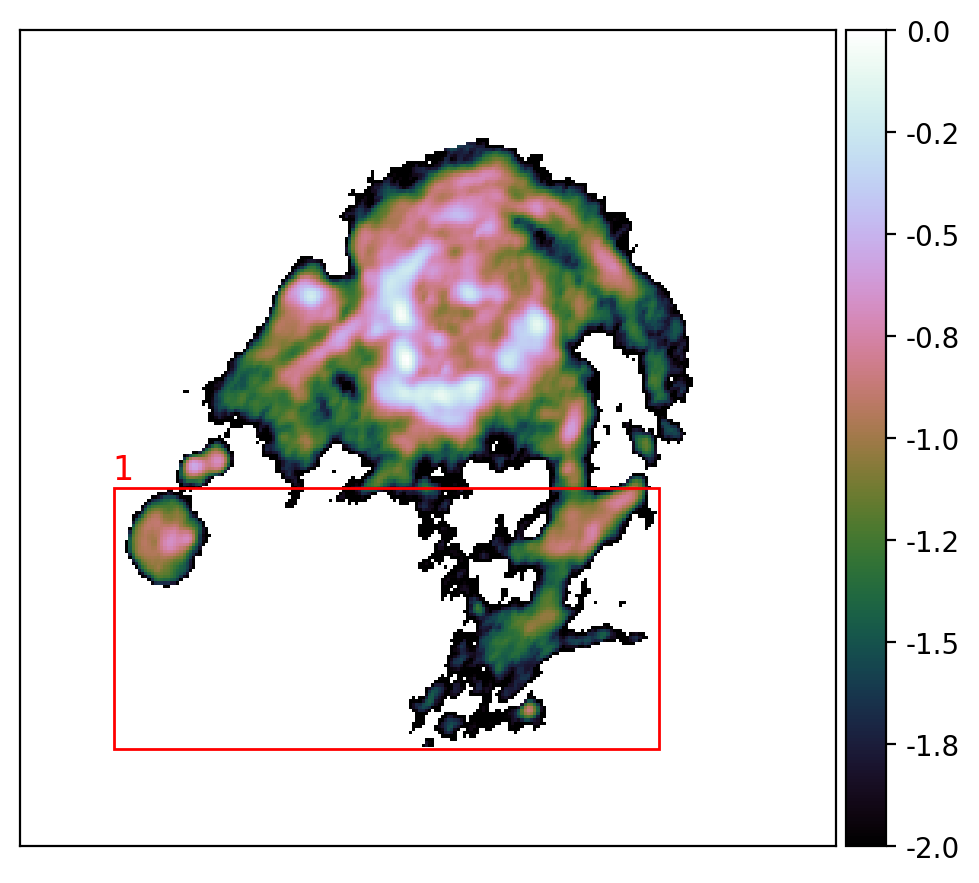

In [32]:



fig = plt.figure(figsize=(5,5), dpi=200)
axs = plt.gca()
plt_im = axs.imshow(np.log10(np.abs(img)), cmap=cmap, vmin=vmin_log, vmax=0)
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(plt_im, cax=cax)
cbar.ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%.1f'))
axs.set_yticks([]);axs.set_xticks([])
# Create a Rectangle patch
rect = patches.Rectangle(
    rect_anchor_xy, rect_width, rect_height,
    linewidth=1, edgecolor='r', facecolor='none'
)
# Add the patch to the Axes
axs.add_patch(rect)
axs.text(
    rect_anchor_xy[0]/img.shape[1] + text_pos[0],
    1 - rect_anchor_xy[1]/img.shape[0] + text_pos[1],
    textstr, transform=axs.transAxes, 
    fontdict=font, verticalalignment='top'
)
plt.tight_layout()
# plt.savefig(
#     '{:s}{:s}{:s}{:s}{:s}{:s}'.format(
#         save_dir, img_name, model_prefix, '_region_', saving_text_str, '-MAP_image_inpaintedRegion.pdf'
#     ),
#     bbox_inches='tight',
#     dpi=200
# )
plt.show()
